In [1]:
import os

directory_path = '/Users/drishttinarwal/Documents/Forex-market-analysis-main/datasets/eurusd'
contents = os.listdir(directory_path)

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"/Users/drishttinarwal/Documents/Forex-market-analysis-main/datasets/eurusd/eurusd_d1.csv")

In [5]:
df

,Unnamed: 0,time,open,high,low,close,tick_volume,spread,real_volume
0,0,2012-01-02,1.29443,1.29681,1.29168,1.29338,40489,5,0
1,1,2012-01-03,1.29337,1.30762,1.29316,1.30509,82261,5,0
2,2,2012-01-04,1.30509,1.30719,1.28974,1.29361,80553,5,0
3,3,2012-01-05,1.29359,1.29434,1.27702,1.27904,92272,5,0
4,4,2012-01-06,1.27907,1.28121,1.26972,1.27188,78126,6,0
...,...,...,...,...,...,...,...,...,...
2590,2590,2021-12-27,1.13202,1.13344,1.13029,1.13269,25151,0,0
2591,2591,2021-12-28,1.13271,1.13334,1.12896,1.13085,27333,0,0
2592,2592,2021-12-29,1.13086,1.13688,1.12738,1.13473,35620,0,0
2593,2593,2021-12-30,1.13471,1.13598,1.12986,1.13257,33796,0,0


In [6]:
del df['Unnamed: 0']

In [7]:
df

,time,open,high,low,close,tick_volume,spread,real_volume
0,2012-01-02,1.29443,1.29681,1.29168,1.29338,40489,5,0
1,2012-01-03,1.29337,1.30762,1.29316,1.30509,82261,5,0
2,2012-01-04,1.30509,1.30719,1.28974,1.29361,80553,5,0
3,2012-01-05,1.29359,1.29434,1.27702,1.27904,92272,5,0
4,2012-01-06,1.27907,1.28121,1.26972,1.27188,78126,6,0
...,...,...,...,...,...,...,...,...
2590,2021-12-27,1.13202,1.13344,1.13029,1.13269,25151,0,0
2591,2021-12-28,1.13271,1.13334,1.12896,1.13085,27333,0,0
2592,2021-12-29,1.13086,1.13688,1.12738,1.13473,35620,0,0
2593,2021-12-30,1.13471,1.13598,1.12986,1.13257,33796,0,0


In [8]:
df['SMA10'] = df['close'].rolling(10).mean()
df['SMA20'] = df['close'].rolling(20).mean()

In [9]:
df.isna().sum()

time            0
open            0
high            0
low             0
close           0
tick_volume     0
spread          0
real_volume     0
SMA10           9
SMA20          19
dtype: int64

In [10]:
df['SMA10'].head(20)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     1.281659
10    1.278821
11    1.275713
12    1.274882
13    1.276644
14    1.278754
15    1.281198
16    1.283793
17    1.287705
18    1.290614
19    1.296049
Name: SMA10, dtype: float64

In [11]:
df['SMA20'].head(30)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19    1.288854
20    1.289887
21    1.290072
22    1.291240
23    1.293011
24    1.295198
25    1.296969
26    1.299422
27    1.302138
28    1.304494
29    1.307095
Name: SMA20, dtype: float64

In [12]:
df.dropna()

,time,open,high,low,close,tick_volume,spread,real_volume,SMA10,SMA20
19,2012-01-27,1.31044,1.32330,1.30770,1.32189,83190,5,0,1.296049,1.288854
20,2012-01-30,1.32148,1.32206,1.30767,1.31403,80908,5,0,1.300952,1.289887
21,2012-01-31,1.31404,1.32126,1.30427,1.30879,85860,5,0,1.304430,1.290072
22,2012-02-01,1.30881,1.32168,1.30257,1.31698,87590,5,0,1.307598,1.291240
23,2012-02-02,1.31697,1.31959,1.30854,1.31446,83784,4,0,1.309378,1.293011
...,...,...,...,...,...,...,...,...,...,...
2590,2021-12-27,1.13202,1.13344,1.13029,1.13269,25151,0,0,1.129818,1.130209
2591,2021-12-28,1.13271,1.13334,1.12896,1.13085,27333,0,0,1.130322,1.130059
2592,2021-12-29,1.13086,1.13688,1.12738,1.13473,35620,0,0,1.130853,1.130200
2593,2021-12-30,1.13471,1.13598,1.12986,1.13257,33796,0,0,1.130804,1.130320


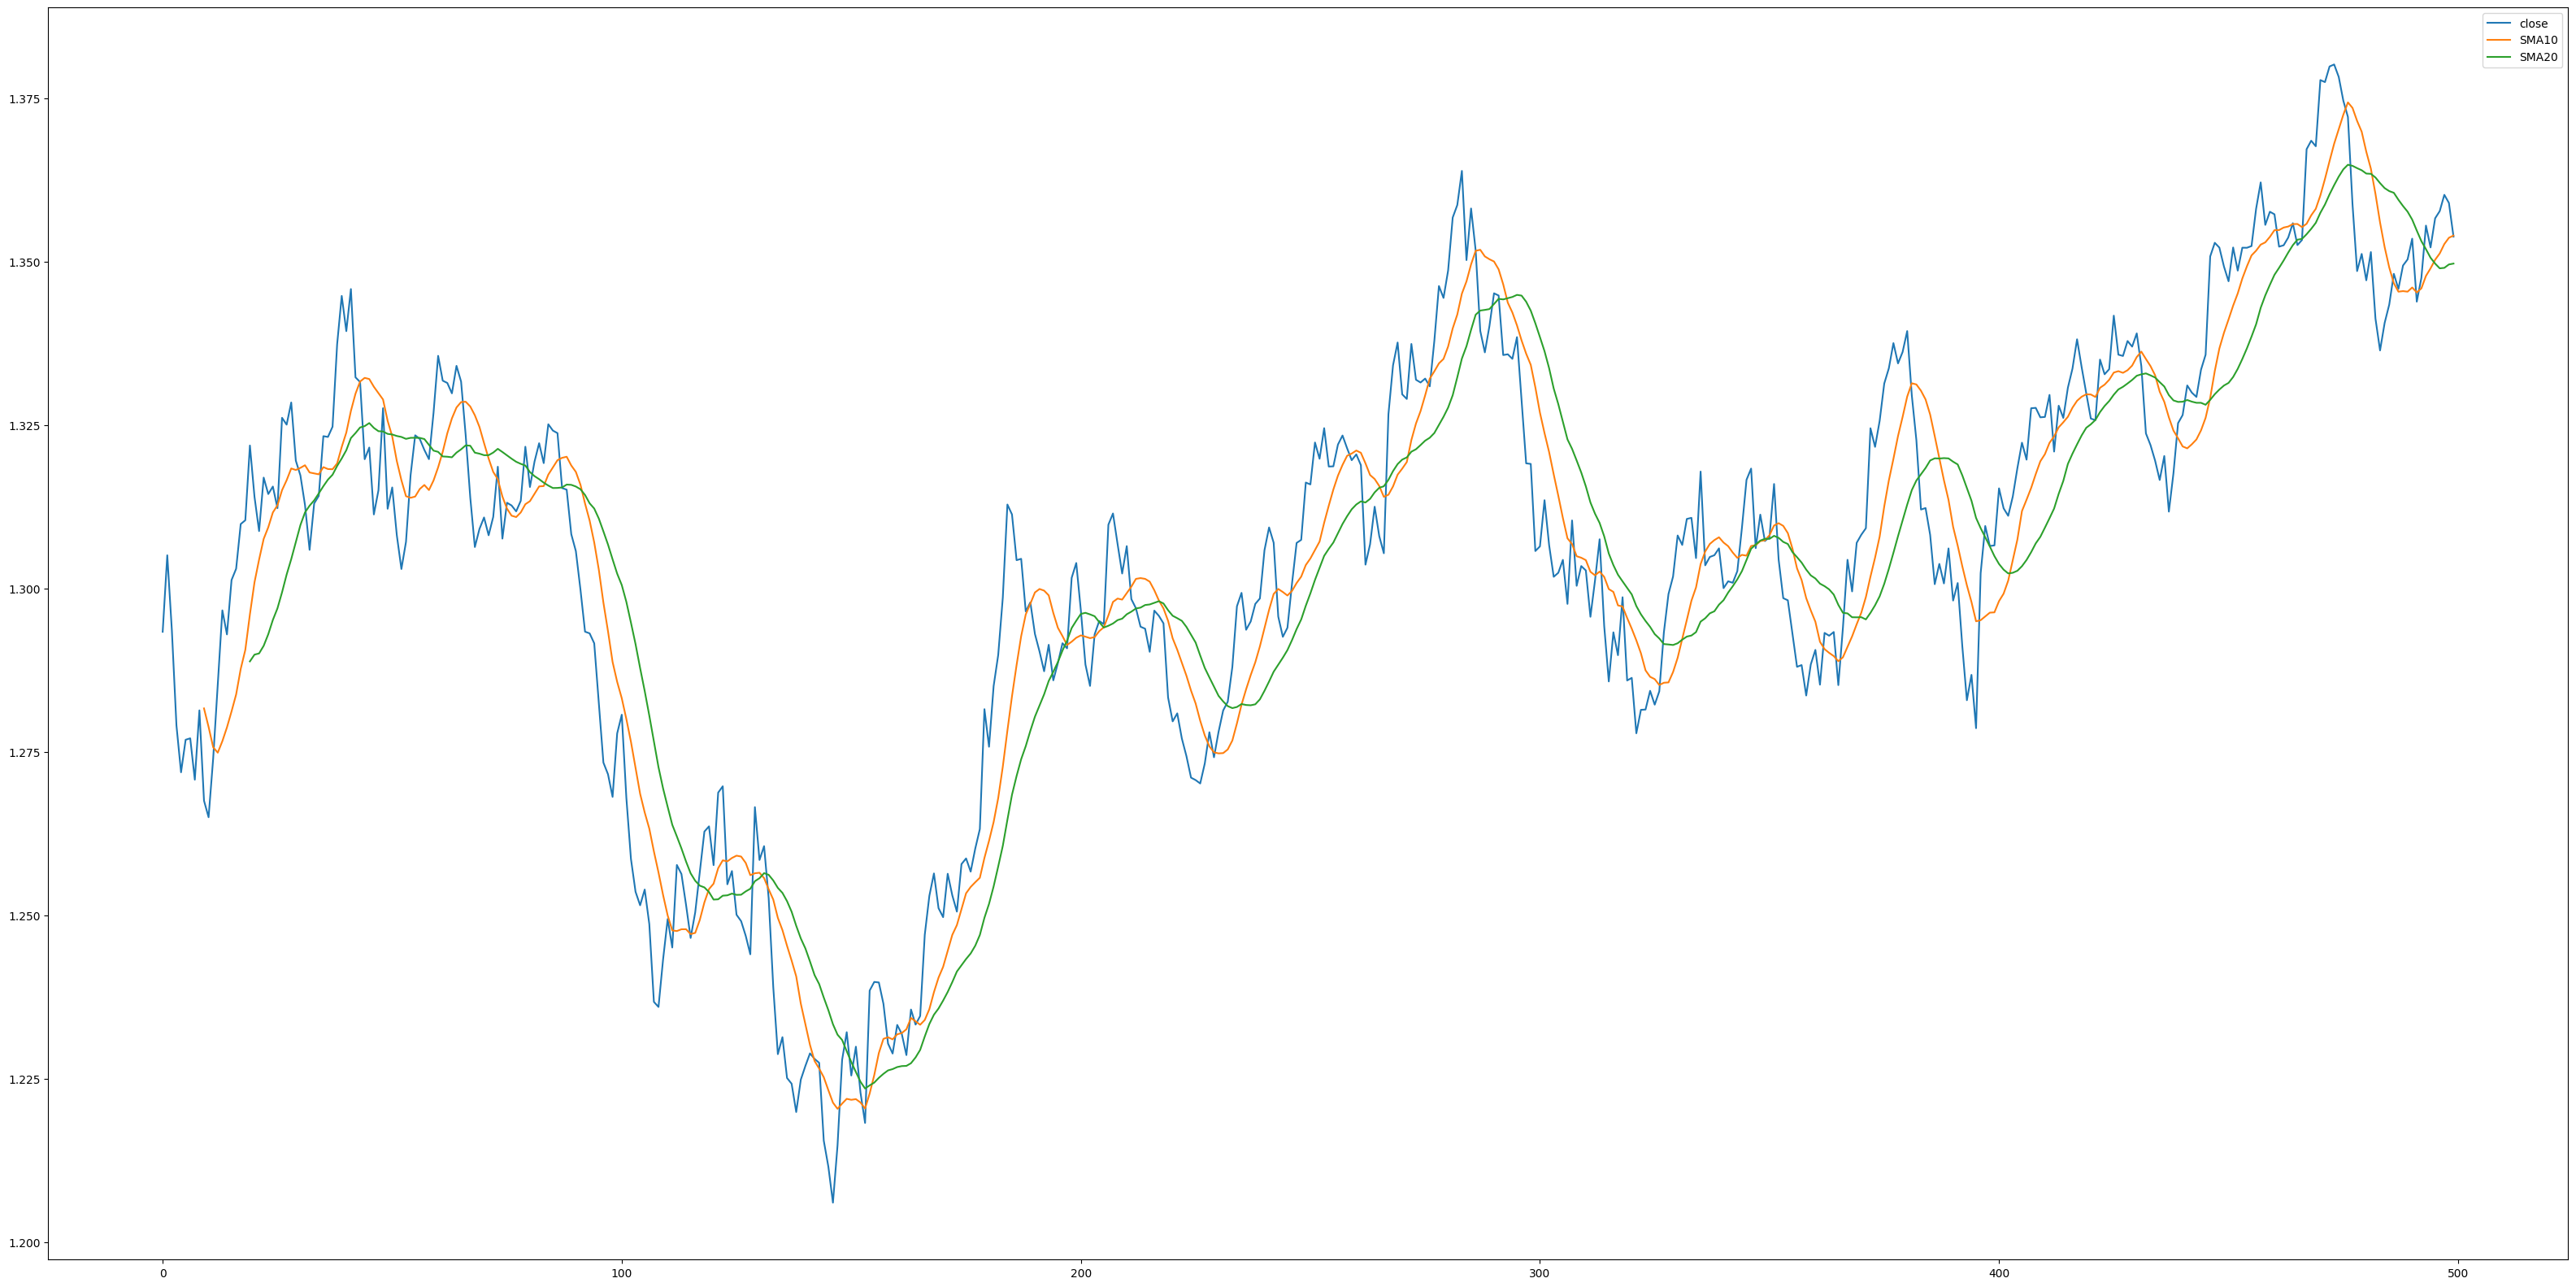

In [15]:
df[['close','SMA10','SMA20']].head(500).plot(figsize=(40,20))
plt.show()